1. The CIFAR-10 dataset consists of a total of 60,000 colour images of dimensions 32 × 32
with a total of 10 classes. There are 50,000 training images and 10,000 test images.
Develop a feedforward neural network (i.e. a MLP) for image classification for this dataset.
Experiment with the number of hidden layers, units per layer, activation functions, etc.
Verify the model(s) by reporting suitable metrics, such as accuracy, precision, recall,
per-class accuracy, etc. What overall accuracy can your model obtain for this dataset?
Visualize some of the correct and incorrect predictions of your model.
Note: You will find that the MLP network is woefully inadequate for this dataset. As
with most image-related problems, convolutional neural networks are vastly superior, and
we will learn about these in class soon

The CIFAR-10 dataset consists of 10 classes of 32x32 color images in the following classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

In [1]:
from google.colab import drive
import netCDF4
import numpy as np
from pickle import TRUE
from keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
!pip install -q -U keras-tuner
import keras_tuner as kt

In [2]:
tf.random.set_seed(6602)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# to determine how your data is being encoded
X_train.dtype 

dtype('uint8')

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# printing the 9th image

print(X_train[9])

# printing the 9th label

print(y_train[9])

[[[125 125 116]
  [110 101  91]
  [102  90  83]
  ...
  [202 207 214]
  [200 205 212]
  [202 208 214]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  ...
  [195 201 205]
  [198 205 209]
  [204 211 215]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  ...
  [122 111 113]
  [139 128 131]
  [158 147 150]]

 ...

 [[104  82  41]
  [101  80  39]
  [101  81  38]
  ...
  [126 103  67]
  [126 103  69]
  [125 101  68]]

 [[104  81  40]
  [105  84  41]
  [109  88  43]
  ...
  [138 113  78]
  [137 113  80]
  [137 112  81]]

 [[105  83  42]
  [108  87  45]
  [115  94  50]
  ...
  [143 117  82]
  [143 116  84]
  [144 116  86]]]
[3]


In [7]:
print(X_train[9].shape)

(32, 32, 3)


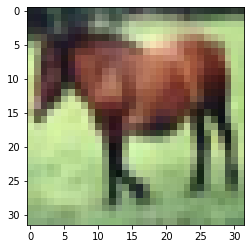

[7]


In [8]:
# displaying the image
plt.imshow(X_train[7])
plt.show()

# print corresponding label
print(y_train[7])

In [9]:
# checking for unique values in y_test and y_train
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use this labels as such or we can perform one hot encoding

In [10]:
# this determines the normalization factor
print("Min value:", np.min(X_train))
print("Max value:", np.max(X_train)) 

Min value: 0
Max value: 255


In [11]:
# Step 2: Build the training/testing pipelines
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label #tf.one_hot(label, 10)

In [12]:
X_train, y_train = normalize_img(X_train, y_train)
X_test, y_test = normalize_img(X_test, y_test)

In [13]:
# Step 3: Create the model
inp = tf.keras.layers.Input(shape=(32,32,3))
b = tf.keras.layers.Flatten()(inp)
b = tf.keras.layers.Dense(64, activation='relu')(b)
b = tf.keras.layers.Dense(128, activation='relu')(b)
out = tf.keras.layers.Dense(10, activation='softmax')(b)

model = tf.keras.models.Model(inp, out)

# Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 206,282
Trainable params: 206,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [15]:
# Step 4: Train the model
hist = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split= 0.2,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=2)
)

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.8844 - accuracy: 0.3153 - val_loss: 1.7747 - val_accuracy: 0.3537
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7316 - accuracy: 0.3778 - val_loss: 1.7666 - val_accuracy: 0.3578
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6745 - accuracy: 0.3971 - val_loss: 1.7059 - val_accuracy: 0.3836
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6299 - accuracy: 0.4126 - val_loss: 1.6382 - val_accuracy: 0.4179
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5860 - accuracy: 0.4304 - val_loss: 1.6872 - val_accuracy: 0.4059
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5687 - accuracy: 0.4374 - val_loss: 1.5938 - val_accuracy: 0.4365
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5453 - accuracy: 0.4458 - val_loss: 1.5695 - val_accuracy:

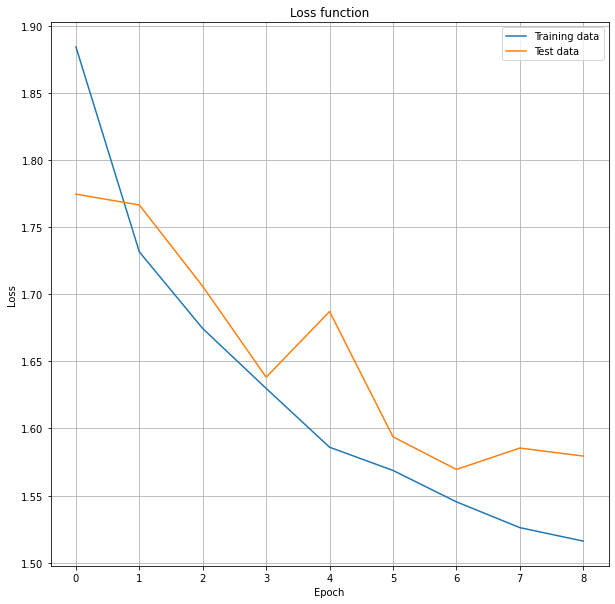

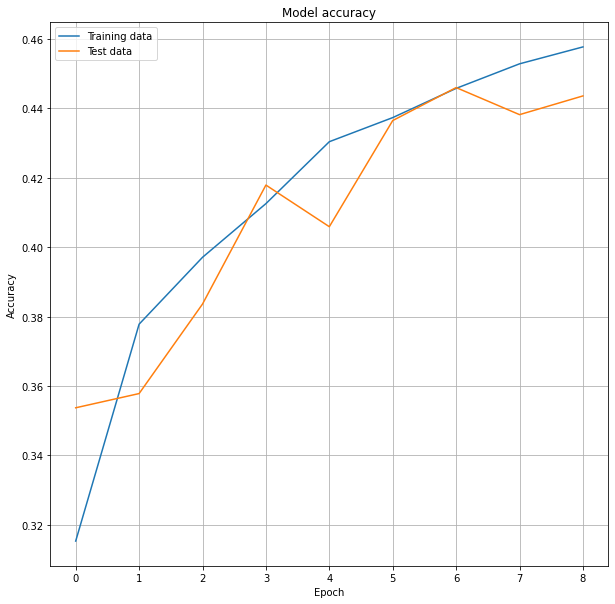

In [16]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])

In [17]:
# Step 5/6: Evaluate the model (we do no hyperparameter tuning here)
loss_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))
#loss_accuracy

Test Loss: 1.549737572669983
Test Accuracy: 0.4503999948501587


In [18]:
def build_model(hp):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten())
  number_hidden_layers = hp.Int('num_layers', 1, 5)
  for i in range(number_hidden_layers):
    model.add(tf.keras.layers.Dense(hp.Int('units', min_value=16,
                                           max_value=128, step=16), 
                                    activation='relu', kernel_initializer='he_normal'))
  
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

  return model

In [19]:
tuner = kt.Hyperband(build_model,
                     objective='val_acc',
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=1,
                     overwrite=True)

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [21]:
tuner.search(X_train, y_train, epochs=20, validation_split= 0.2,
          callbacks = [stop_early])

Trial 254 Complete [00h 01m 15s]
val_acc: 0.4352000057697296

Best val_acc So Far: 0.4844000041484833
Total elapsed time: 01h 38m 44s


In [22]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [23]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

In [24]:
# Train the best model
hist = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=100,
    validation_data=(X_test, y_test),
    callbacks = tf.keras.callbacks.EarlyStopping(patience=2)
)

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 1.9080 - acc: 0.3123 - val_loss: 1.7257 - val_acc: 0.3858
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 1.7057 - acc: 0.3871 - val_loss: 1.6617 - val_acc: 0.4027
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 1.6275 - acc: 0.4179 - val_loss: 1.6069 - val_acc: 0.4251
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 1.5728 - acc: 0.4379 - val_loss: 1.6211 - val_acc: 0.4316
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 1.5383 - acc: 0.4509 - val_loss: 1.5772 - val_acc: 0.4358
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 1.5131 - acc: 0.4587 - val_loss: 1.5617 - val_acc: 0.4423
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 1.4912 - acc: 0.4676 - val_loss: 1.5769 - val_acc: 0.4343
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 1.

In [101]:
# overview of our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Evaluate the best model
loss_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))
loss_accuracy

Test Loss: 1.4750816822052002
Test Accuracy: 0.4819999933242798


[1.4750816822052002, 0.4819999933242798]

In [103]:
y_pred = model.predict(X_test)
print(y_pred)


313/313 [==============================] - 1s 2ms/step
[[5.2428478e-03 1.8414444e-01 9.3609160e-03 ... 2.6836444e-03
  1.9805397e-01 1.4326361e-01]
 [1.7523048e-02 2.6464090e-01 1.0378266e-03 ... 5.9547008e-04
  2.0758975e-01 5.0599414e-01]
 [1.9513132e-01 1.4673565e-01 3.9969026e-03 ... 5.7437397e-03
  5.5703831e-01 8.6130776e-02]
 ...
 [2.0107345e-03 5.6672125e-04 8.5955031e-02 ... 2.9360903e-02
  1.9069653e-02 3.8260634e-03]
 [6.6326812e-02 4.5030147e-02 1.8368964e-01 ... 4.3751255e-02
  1.8895824e-02 1.7201521e-02]
 [3.8319267e-02 5.8879447e-03 5.8039002e-02 ... 6.5535980e-01
  1.0437702e-02 2.5612189e-02]]


In [92]:
# converting the prediction probabilities to class label
#y_pred_labels = [np.argmax(i) for i in y_pred]
#y_true = [np.argmax(i) for i in y_test]


In [104]:
# converting the predicted probabilities to class label
y_pred_labels = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
y_pred_labels = y_pred_labels.reshape(-1,1)
print(y_pred_labels.shape)
print(y_test.shape)

(10000, 1)
(10000, 1)


[[531  34  34  42  44  68  29  36 133  49]
 [ 54 567   7  30  11  33  14  28  77 179]
 [ 72  21 198  91 158 198 125  86  27  24]
 [ 17  15  37 296  46 335 141  45  31  37]
 [ 38   6  58  59 456 135 116  90  31  11]
 [ 14   9  33 173  55 517  80  62  38  19]
 [  5  10  28  95 107 124 582  19   6  24]
 [ 34  14  17  80 103 120  34 526  27  45]
 [145  43   6  44  28  37   9  12 608  68]
 [ 50 138   2  57  29  30  27  41  87 539]]


Text(69.0, 0.5, 'True Label')

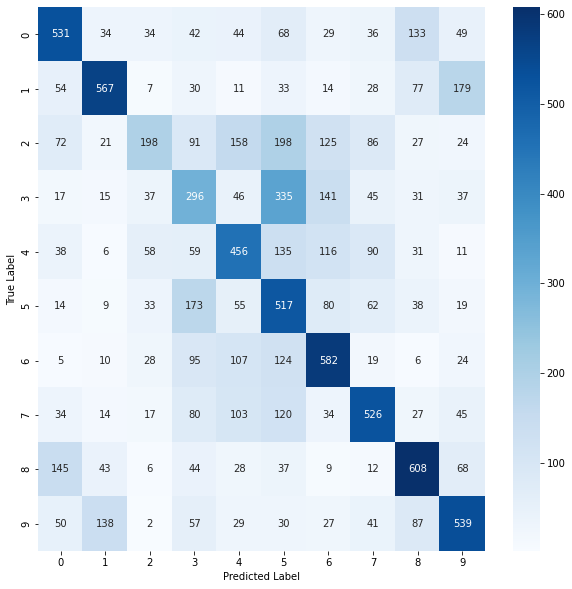

In [105]:
# Confusion Matrix to visualize the correct and incorrect predictions of the model
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

All the values in the diagonal represent the true predictions made by the model

In [106]:
# checking the correct and incorrect predictions
correct_indices = np.nonzero(y_pred_labels == y_test)[0]
incorrect_indices = np.nonzero(y_pred_labels != y_test)[0]
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

4820 classified correctly
5180 classified incorrectly


- As we can see, the wrong predictions are more than the correct predictions.
- The MLP network is woefully inadequate for this dataset.